<a href="https://colab.research.google.com/github/profcintiapinho/laboratorio_ia/blob/main/Classifica%C3%A7%C3%A3o_de_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando uma base de dados aleat√≥ria de sentimentos, voc√™s podem at√© fazer o download dela e acrescentar mais frases depois

In [ ]:
#importanto a base de dados do Github da Prof c√≠ntia Pinho
import pandas as pd

url = 'https://github.com/profcintiapinho/laboratorio_ia/raw/refs/heads/main/sentimentos.xlsx'
base = pd.read_excel(url)

base

frase sentimento
0                        n√£o precisei pagar o ingresso    alegria
1                          se eu ajeitar tudo fica bem    alegria
2    Fechei aquela venda dif√≠cil e estou me sentind...    alegria
3    Quando o cliente elogia seu atendimento e aind...    alegria
4    Nada se compara √† sensa√ß√£o de bater a meta ant...    alegria
..                                                 ...        ...
905  N√£o √© poss√≠vel que ningu√©m veja o absurdo do q...      raiva
906  Se eu n√£o me controlar, perco a cabe√ßa com tan...      raiva
907  Cansei de me calar diante de tanta injusti√ßa d...      raiva
908  Fizeram promessas s√≥ pra me usar ‚Äî e agora fin...      raiva
909  Se eu soubesse que ia ser tratado assim, nunca...      raiva

[910 rows x 2 columns]

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
type(base)

pandas.core.frame.DataFrame

## Embaralhando a base

In [ ]:
#Embraralhando a base
import sklearn
base = sklearn.utils.shuffle(base)

In [ ]:
base

frase sentimento
221                         temo pela sua seguran√ßa       medo
626  N√£o suporto a ideia de viver uma vida infeliz.       medo
195                    ou√ßo passos na minha dire√ß√£o       medo
685      Sinto uma irrita√ß√£o que n√£o cabe no peito.      raiva
721     Minhas tentativas parecem sempre fracassar.   tristeza
..                                              ...        ...
476    Enquanto isso, quem deveria proteger, abusa!      raiva
765        Fico sorrindo, mas por dentro s√≥ h√° dor.   tristeza
443                   Eles acham que somos idiotas.      raiva
545          √â tanta alegria que n√£o cabe no peito!    alegria
69                               como o luar e belo    alegria

[910 rows x 2 columns]

In [ ]:
#para acessar um item quando √© um dataframe
base.iloc[[10]]

frase sentimento
617  A fam√≠lia toda reunida em volta da mesa √© minh...    alegria

In [ ]:
#quantidade de linhas de um dataframe
base.shape

(910, 2)

In [ ]:
#quantidade de linhas de uma lista
len(base)

910

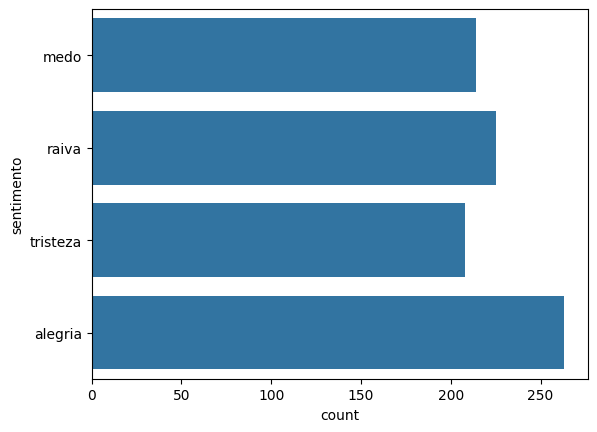

In [ ]:
import seaborn as sns
sns.countplot(base['sentimento'], label = 'Contagem');

#vamos ver como fazer uma nuvem de palavras

In [ ]:
# Importa a biblioteca spaCy para processamento de linguagem natural
import spacy

# Importa a biblioteca WordCloud para criar nuvens de palavras
from wordcloud import WordCloud

# Importa o matplotlib para mostrar gr√°ficos e imagens na tela
import matplotlib.pyplot as plt

In [ ]:
# Comando para baixar e instalar o modelo de linguagem em portugu√™s do spaCy
!python -m spacy download pt_core_news_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.0/13.0 MB 32.7 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Carrega o modelo do spaCy para portugu√™s
nlp = spacy.load("pt_core_news_sm")

In [ ]:
# Pega os sentimentos diferentes que existem na base
sentimentos = base['sentimento'].unique()
print(sentimentos)

['medo' 'raiva' 'tristeza' 'alegria']


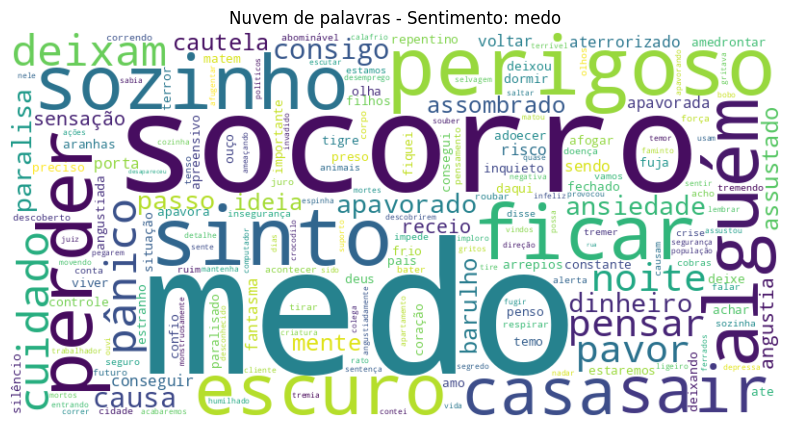

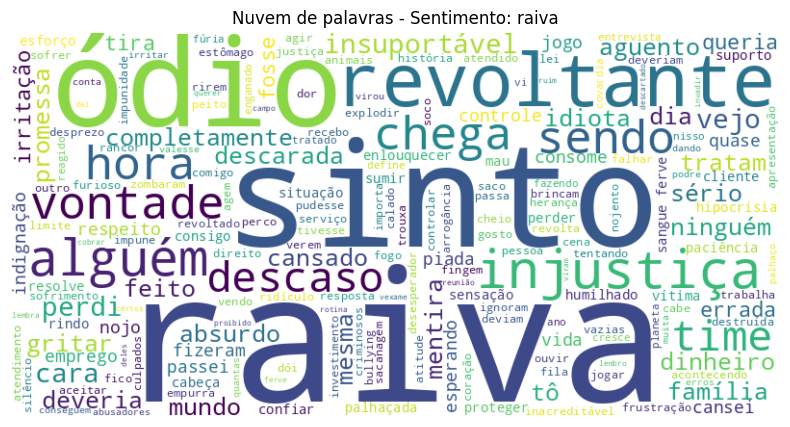

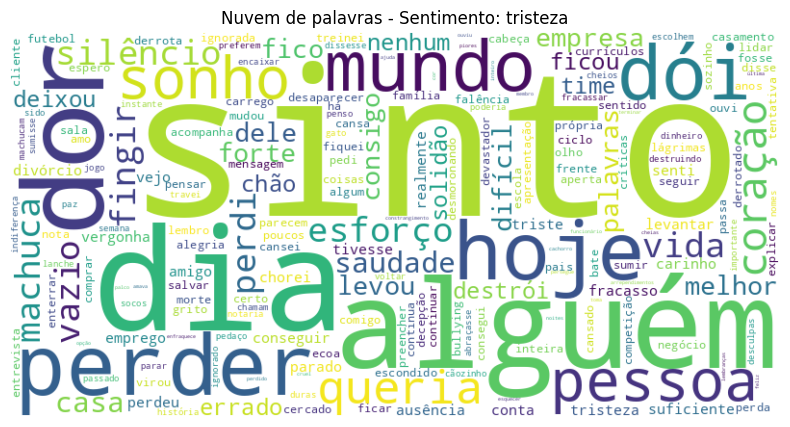

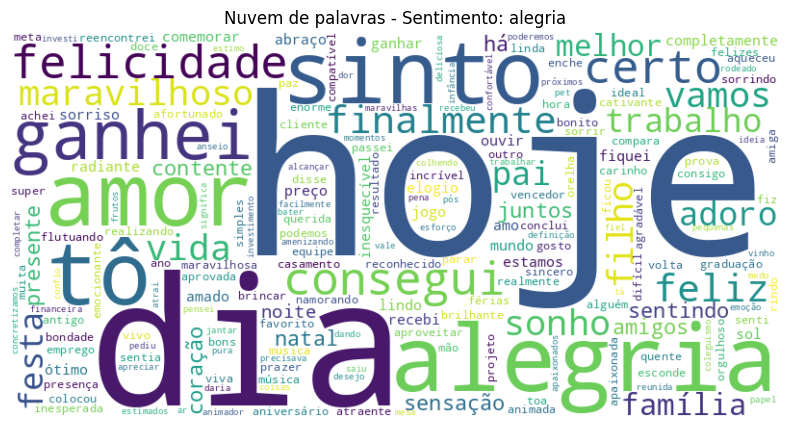

In [ ]:
# Vamos criar uma nuvem para cada sentimento
for sentimento in sentimentos:
    # Filtra as frases daquele sentimento
    frases = base[base['sentimento'] == sentimento]['frase']

    # Junta tudo em uma √∫nica string, para facilitar a nuvem
    texto = " ".join(frases)

    # Passa o texto pelo spaCy
    doc = nlp(texto)

    # Vamos criar uma lista s√≥ com palavras que n√£o s√£o stopwords, nem pontua√ß√£o, nem espa√ßos
    palavras_sem_stopwords = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            palavras_sem_stopwords.append(token.text.lower())

    # Junta as palavras limpas para gerar a nuvem
    texto_limpo = " ".join(palavras_sem_stopwords)

    # Cria a nuvem de palavras
    nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto_limpo)

    # Mostra a nuvem
    plt.figure(figsize=(10,5))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de palavras - Sentimento: {sentimento}')
    plt.show()

### Com base na nuvem de palavras voc√™ pode tentar tirar aquelas palavras que s√£o muito comuns em todos os sentimentos como: ningu√©m, veja como acrescentar uma stopword.

In [ ]:
# Lista de palavras que voc√™ quer ignorar
minhas_stopwords = ["ningu√©m", "deu", "fico", "mim", "pra", "queria", "gente", "deixa","vou"]

# Adiciona essas palavras √† lista de stopwords do spaCy
for palavra in minhas_stopwords:
    nlp.vocab[palavra].is_stop = True


#agora se voc√™ rodar o c√≥digo anterior de novo, vai ver que ele tirou essas palavras das nuvens, pode adicionar outra se achar necess√°rio.

## Vamos contar quantas frases tem cada sentimento, usando outro tipo de gr√°fico

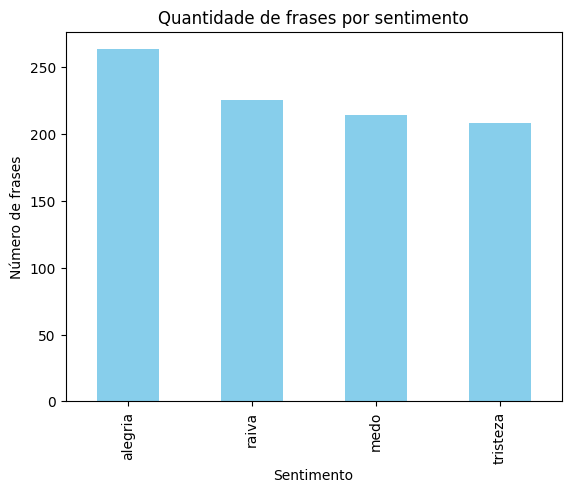

In [ ]:
base['sentimento'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Quantidade de frases por sentimento")
plt.xlabel("Sentimento")
plt.ylabel("N√∫mero de frases")
plt.show()

### Contar palavras mais comuns por sentimento

In [ ]:
from collections import Counter

for sentimento in sentimentos:
    frases = base[base['sentimento'] == sentimento]['frase']
    texto = " ".join(frases)
    doc = nlp(texto)

    palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    contagem = Counter(palavras).most_common(10)

    print(f"\nPalavras mais comuns em: {sentimento}")
    for palavra, freq in contagem:
        print(f"{palavra}: {freq}")


Palavras mais comuns em: medo
medo: 13
socorro: 7
sinto: 7
ficar: 6
sozinho: 6
perder: 6
perigoso: 6
algu√©m: 6
escuro: 6
sair: 5

Palavras mais comuns em: raiva
raiva: 25
sinto: 15
√≥dio: 10
revoltante: 9
injusti√ßa: 8
algu√©m: 7
vontade: 6
chega: 6
sendo: 6
time: 5

Palavras mais comuns em: tristeza
sinto: 31
algu√©m: 11
dor: 9
perder: 8
hoje: 8
d√≥i: 7
mundo: 7
dia: 7
queria: 6
cora√ß√£o: 5

Palavras mais comuns em: alegria
hoje: 21
 : 12
dia: 11
alegria: 9
amor: 8
t√¥: 8
ganhei: 8
felicidade: 7
certo: 7
consegui: 7


Essa √© mais uma chance para voc√™ retirar palavras que acredita que fazem sentido para qualquer sentimento. Mas por enquanto estamos fazendo s√≥ uma an√°lise para entender sua base de dados, aqui voltamos a pegar a base todas, sem aplicar as stopwords.

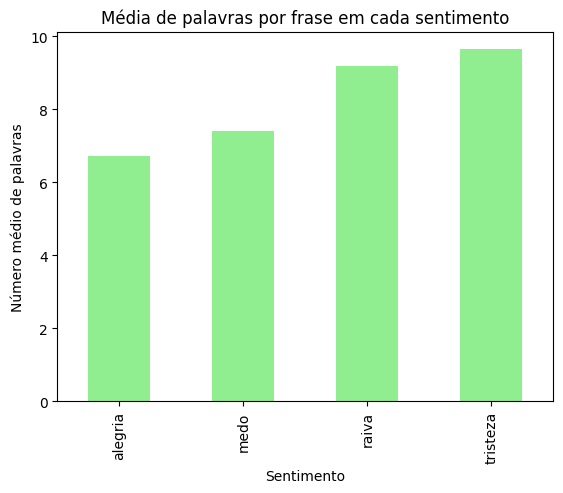

In [ ]:
# Contar o n√∫mero m√©dio de palavras por frase
base['n_palavras'] = base['frase'].apply(lambda x: len(x.split()))
media_palavras = base.groupby('sentimento')['n_palavras'].mean()

media_palavras.plot(kind='bar', color='lightgreen')
plt.title("M√©dia de palavras por frase em cada sentimento")
plt.ylabel("N√∫mero m√©dio de palavras")
plt.xlabel("Sentimento")
plt.show()

## Vamos pegar frases aleat√≥rias que podem trazer confus√£o a base de dados

In [ ]:
# Aleatoriamente, mostra uma frase de cada sentimento
for sentimento in sentimentos:
    frase = base[base['sentimento'] == sentimento].sample(1)['frase'].values[0]
    print(f"{sentimento.upper()}: {frase}")

MEDO: aterrorizado e suando frio
RAIVA: Me parte o cora√ß√£o ver bichos sofrendo por causa de humanos cru√©is.
TRISTEZA: Sinto que estou me perdendo um pouco mais a cada dia.
ALEGRIA: ele e realmente fiel a mim


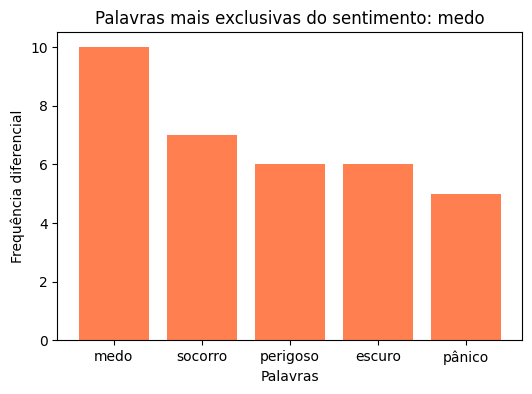

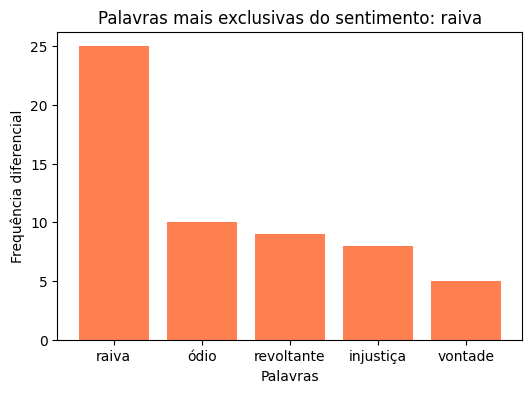

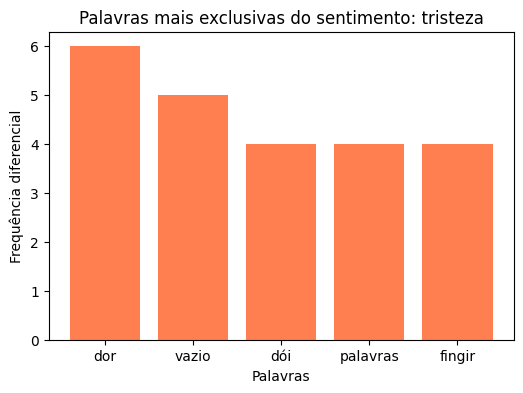

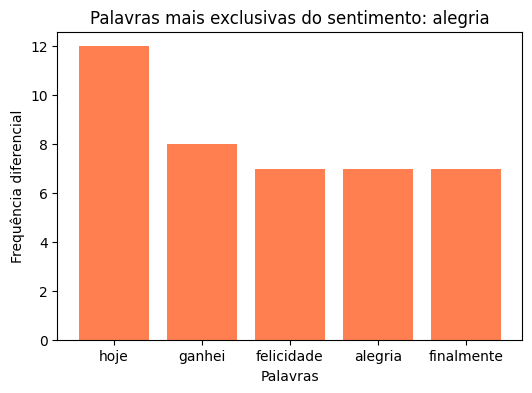

In [ ]:
# Lista dos sentimentos
sentimentos = ['medo', 'raiva', 'tristeza', 'alegria']

# Um dicion√°rio para guardar as palavras mais comuns de cada sentimento
palavras_por_sentimento = {}

# Processa cada sentimento
for sentimento in sentimentos:
    frases = base[base['sentimento'] == sentimento]['frase']
    texto = " ".join(frases)
    doc = nlp(texto)

    # Conta as palavras, ignorando stopwords, pontua√ß√£o e espa√ßos
    palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    contagem = Counter(palavras)

    palavras_por_sentimento[sentimento] = contagem

# Agora vamos encontrar as palavras mais "exclusivas" de cada sentimento
for sentimento in sentimentos:
    outras = [s for s in sentimentos if s != sentimento]

    # Palavras do sentimento atual
    palavras_sent = palavras_por_sentimento[sentimento]

    # Palavras dos outros sentimentos somadas
    palavras_outros = Counter()
    for outro in outras:
        palavras_outros += palavras_por_sentimento[outro]

    # Calcula as palavras que aparecem mais no sentimento atual do que nos outros
    diferencas = {}
    for palavra in palavras_sent:
        freq_atual = palavras_sent[palavra]
        freq_outros = palavras_outros.get(palavra, 0)
        diferenca = freq_atual - freq_outros
        if diferenca > 0:
            diferencas[palavra] = diferenca

    # Pega as 5 palavras mais exclusivas
    top_exclusivas = sorted(diferencas.items(), key=lambda x: x[1], reverse=True)[:5]

    # Plota o gr√°fico
    palavras = [item[0] for item in top_exclusivas]
    valores = [item[1] for item in top_exclusivas]

    plt.figure(figsize=(6, 4))
    plt.bar(palavras, valores, color='coral')
    plt.title(f'Palavras mais exclusivas do sentimento: {sentimento}')
    plt.ylabel('Frequ√™ncia diferencial')
    plt.xlabel('Palavras')
    plt.show()

### Lembrando que os c√≥digos anteriores n√£o foram usados fun√ß√µes porque voc√™s ainda n√£o tiveram, s√≥ at√© la√ßos de repeti√ß√£o, ent√£o n√£o usamos fun√ß√µes aqui.

# Agora que voc√™ entendeu melhor a base pode rodar um algoritmo de Machine Learn para prever sentimentos com base em frases novas.

##Vamos Separar texto do r√≥tulo - O sentimento √© o que queremos prever, ent√£o fica separado.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
frases = base[['frase']]
sentimento = base['sentimento'].values

In [ ]:
frases.head()

frase
221                         temo pela sua seguran√ßa
626  N√£o suporto a ideia de viver uma vida infeliz.
195                    ou√ßo passos na minha dire√ß√£o
685      Sinto uma irrita√ß√£o que n√£o cabe no peito.
721     Minhas tentativas parecem sempre fracassar.

In [ ]:
sentimento

array(['medo', 'medo', 'medo', 'raiva', 'tristeza', 'medo', 'medo',
       'tristeza', 'raiva', 'raiva', 'alegria', 'alegria', 'tristeza',
       'medo', 'tristeza', 'tristeza', 'raiva', 'alegria', 'tristeza',
       'medo', 'alegria', 'alegria', 'raiva', 'raiva', 'alegria',
       'alegria', 'medo', 'tristeza', 'medo', 'alegria', 'alegria',
       'medo', 'alegria', 'medo', 'raiva', 'raiva', 'alegria', 'raiva',
       'alegria', 'medo', 'alegria', 'raiva', 'alegria', 'alegria',
       'alegria', 'medo', 'tristeza', 'alegria', 'raiva', 'tristeza',
       'medo', 'alegria', 'alegria', 'tristeza', 'raiva', 'alegria',
       'raiva', 'raiva', 'alegria', 'alegria', 'medo', 'tristeza',
       'raiva', 'raiva', 'medo', 'medo', 'alegria', 'tristeza', 'raiva',
       'alegria', 'alegria', 'raiva', 'tristeza', 'medo', 'tristeza',
       'raiva', 'raiva', 'raiva', 'alegria', 'raiva', 'tristeza',
       'tristeza', 'alegria', 'alegria', 'alegria', 'medo', 'raiva',
       'alegria', 'alegria', 'me

## Remo√ß√£o das Stop Words apenas das frases, realmente ver se a pena fazer com ou sem.

In [ ]:
# Fun√ß√£o para remover stopwords e pontua√ß√µes
def limpar_texto(texto):
    doc = nlp(texto)
    palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return " ".join(palavras)

# Aplica a fun√ß√£o de limpeza nas frases
base['frase_limpa'] = base['frase'].apply(limpar_texto)

In [ ]:
base

frase sentimento  n_palavras  \
221                         temo pela sua seguran√ßa       medo           4   
626  N√£o suporto a ideia de viver uma vida infeliz.       medo           9   
195                    ou√ßo passos na minha dire√ß√£o       medo           5   
685      Sinto uma irrita√ß√£o que n√£o cabe no peito.      raiva           8   
721     Minhas tentativas parecem sempre fracassar.   tristeza           5   
..                                              ...        ...         ...   
476    Enquanto isso, quem deveria proteger, abusa!      raiva           6   
765        Fico sorrindo, mas por dentro s√≥ h√° dor.   tristeza           8   
443                   Eles acham que somos idiotas.      raiva           5   
545          √â tanta alegria que n√£o cabe no peito!    alegria           8   
69                               como o luar e belo    alegria           5   

                          frase_limpa  
221                    temo seguran√ßa  
626  suporto ideia viver vida infeliz  
195               ou√ßo passos dire√ß√£o  
685        sinto irrita√ß√£o cabe peito  
721      tentativas parecem fracassar  
..                                ...  
476            deveria proteger abusa  
765              fico sorrindo h√° dor  
443                     acham idiotas  
545                alegria cabe peito  
69                          luar belo  

[910 rows x 4 columns]

## Entendendo para o que √© uma vetoriza√ß√£o

## üß† Transformando palavras em n√∫meros com Bag of Words

Antes de aplicar algoritmos, precisamos transformar as **frases em n√∫meros**, pois o computador **n√£o entende palavras** como n√≥s.

---

### üì¶ O que √© "Bag of Words"?

Imagine um **saco cheio de palavras** (o vocabul√°rio da base). Cada frase ser√° convertida em uma **tabela** com quantas vezes cada palavra aparece.

#### üî§ Exemplo:

Temos 3 frases:

- "gosto de sorvete"  
- "n√£o gosto de chuva"  
- "sorvete √© bom"  

Nosso vocabul√°rio ser√°:  
**[gosto, de, sorvete, n√£o, chuva, √©, bom]**

Cada frase ser√° transformada em uma contagem:

| Frase                | gosto | de | sorvete | n√£o | chuva | √© | bom |
|---------------------|:-----:|:--:|:-------:|:---:|:-----:|:-:|:---:|
| gosto de sorvete    |   1   | 1  |    1    |  0  |   0   | 0 |  0  |
| n√£o gosto de chuva  |   1   | 1  |    0    |  1  |   1   | 0 |  0  |
| sorvete √© bom       |   0   | 0  |    1    |  0  |   0   | 1 |  1  |

Sendo assim, esse processo que est√° sendo relizado abaixo √© para converter todas as frases em n√∫meros

In [ ]:
# Vetoriza as frases limpas (Bag of Words)
vetorizador = CountVectorizer()
 = vetorizador.fit_transform(base['frase_limpa'])

# R√≥tulos (sentimentos)
y = base['sentimento']

In [ ]:
# se voc√™ tentar imprimir vai ver que ele se torna uma matriz de n√∫meros e n√£o √© poss√≠vel a visualiza√ß√£o
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3206 stored elements and shape (910, 1668)>

# Esse c√≥digo √© s√≥ para Ilustrar o que acontece com a base de dados ap√≥s vetorizar, assim voc√™ tem uma ideia do que acontece.

In [ ]:
# Converte X (matriz esparsa) em um DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vetorizador.get_feature_names_out())

# Junta com a frase original (s√≥ as primeiras para n√£o ficar gigante)
visualizacao = pd.concat([base[['frase']].reset_index(drop=True), X_df], axis=1)

# Mostra as 5 primeiras
visualizacao.head()

# Essa imagem mostra como exatamente  o CountVectorizer transforma as frases: cada linha representa uma frase, e cada coluna √© uma palavra do vocabul√°rio. O n√∫mero "1" significa que aquela palavra aparece na frase correspondente, e "0" significa que n√£o aparece.

frase  abomin√°vel  abra√ßasse  \
0                         temo pela sua seguran√ßa           0          0   
1  N√£o suporto a ideia de viver uma vida infeliz.           0          0   
2                    ou√ßo passos na minha dire√ß√£o           0          0   
3      Sinto uma irrita√ß√£o que n√£o cabe no peito.           0          0   
4     Minhas tentativas parecem sempre fracassar.           0          0   

   abra√ßo  abrisse  absurdo  absurdos  abundancia  abundante  abusa  ...  \
0       0        0        0         0           0          0      0  ...   
1       0        0        0         0           0          0      0  ...   
2       0        0        0         0           0          0      0  ...   
3       0        0        0         0           0          0      0  ...   
4       0        0        0         0           0          0      0  ...   

   √°gua  √¢nimo  √¢nimos  √©tica  √≠mpeto  √≥dio  √≥rg√£o  √≥timo  √∫ltima  √∫nica  
0     0      0       0      0       0     0      0      0       0      0  
1     0      0       0      0       0     0      0      0       0      0  
2     0      0       0      0       0     0      0      0       0      0  
3     0      0       0      0       0     0      0      0       0      0  
4     0      0       0      0       0     0      0      0       0      0  

[5 rows x 1669 columns]

## 3. Dividir os dados em treino e teste

In [ ]:
# Divide os dados em conjuntos de treino e teste.
# X_treino e y_treino ser√£o usados para treinar o modelo,
# enquanto X_teste e y_teste ser√£o usados para avaliar a performance do modelo.
# 'test_size=0.2' indica que 20% dos dados ser√£o reservados para teste.
# 'random_state=42' garante que a divis√£o seja reproduz√≠vel, ou seja,
# sempre que rodar o c√≥digo com essa semente, o resultado ser√° o mesmo.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

 4. Treinar 3 modelos de classifica√ß√£o

In [ ]:
# Importa o classificador Naive Bayes Multinomial, ideal para dados de texto (ex: an√°lise de sentimentos)
from sklearn.naive_bayes import MultinomialNB

# Importa o modelo de Regress√£o Log√≠stica, um classificador linear simples e eficiente
from sklearn.linear_model import LogisticRegression

# Importa o Random Forest, um modelo de ensemble baseado em v√°rias √°rvores de decis√£o (muito robusto)
from sklearn.ensemble import RandomForestClassifier

# Importa o Gradient Boosting, outro modelo de ensemble que constr√≥i √°rvores de forma sequencial (muito preciso)
from sklearn.ensemble import GradientBoostingClassifier

# Importa o classificador SGD (Stochastic Gradient Descent), √∫til para grandes volumes de dados e com v√°rios algoritmos poss√≠veis (ex: SVM, regress√£o log√≠stica)
from sklearn.linear_model import SGDClassifier

# Importa a fun√ß√£o para exibir m√©tricas de desempenho (precis√£o, recall, F1-score etc.)
from sklearn.metrics import classification_report

# Naive Bayes
modelo_nb = MultinomialNB()
modelo_nb.fit(X_treino, y_treino)
y_pred_nb = modelo_nb.predict(X_teste)

# Regress√£o Log√≠stica
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_treino, y_treino)
y_pred_lr = modelo_lr.predict(X_teste)

# Random Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_treino, y_treino)
y_pred_rf = modelo_rf.predict(X_teste)

# GradientBoostingClassifier
modelo_gdb = RandomForestClassifier()
modelo_gdb.fit(X_treino, y_treino)
y_pred_gdb = modelo_gdb.predict(X_teste)

# SGDClassifier
modelo_sgd = RandomForestClassifier()
modelo_sgd.fit(X_treino, y_treino)
y_pred_sgd = modelo_sgd.predict(X_teste)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Lista com os r√≥tulos originais, na ordem correta
rotulos = ['medo', 'raiva', 'tristeza', 'alegria']

def plotar_matriz_confusao(y_true, y_pred, modelo_nome):
    cm = confusion_matrix(y_true, y_pred, labels=rotulos)  # garante a ordem
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=rotulos, yticklabels=rotulos)
    plt.title(f'Matriz de Confus√£o - {modelo_nome}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()


=== Naive Bayes ===
              precision    recall  f1-score   support

     alegria       0.74      0.80      0.77        46
        medo       0.86      0.72      0.78        43
       raiva       0.76      0.73      0.75        52
    tristeza       0.61      0.68      0.64        41

    accuracy                           0.74       182
   macro avg       0.74      0.73      0.74       182
weighted avg       0.74      0.74      0.74       182



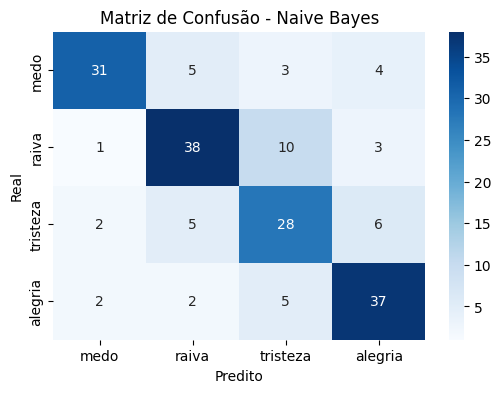

=== Regress√£o Log√≠stica ===
              precision    recall  f1-score   support

     alegria       0.63      0.87      0.73        46
        medo       0.84      0.72      0.78        43
       raiva       0.81      0.65      0.72        52
    tristeza       0.72      0.71      0.72        41

    accuracy                           0.74       182
   macro avg       0.75      0.74      0.74       182
weighted avg       0.75      0.74      0.74       182



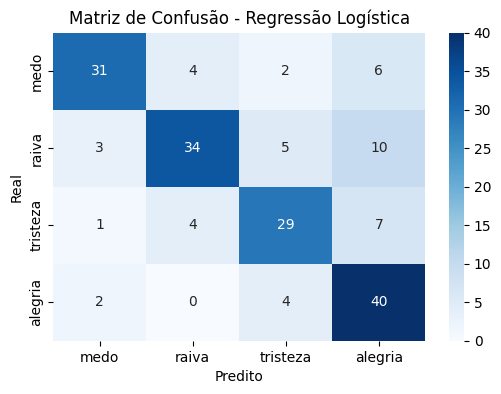

=== Random Forest ===
              precision    recall  f1-score   support

     alegria       0.70      0.50      0.58        46
        medo       0.81      0.49      0.61        43
       raiva       0.87      0.38      0.53        52
    tristeza       0.30      0.73      0.43        41

    accuracy                           0.52       182
   macro avg       0.67      0.53      0.54       182
weighted avg       0.68      0.52      0.54       182



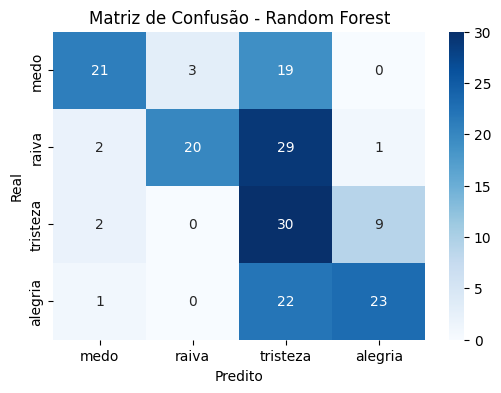

=== GradientBoostingClassifier ===
              precision    recall  f1-score   support

     alegria       0.66      0.46      0.54        46
        medo       0.77      0.47      0.58        43
       raiva       0.91      0.38      0.54        52
    tristeza       0.30      0.76      0.43        41

    accuracy                           0.51       182
   macro avg       0.66      0.52      0.52       182
weighted avg       0.68      0.51      0.53       182



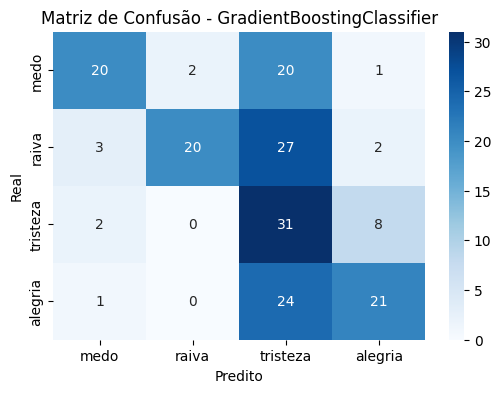

=== SGDClassifier ===
              precision    recall  f1-score   support

     alegria       0.70      0.50      0.58        46
        medo       0.84      0.49      0.62        43
       raiva       0.91      0.38      0.54        52
    tristeza       0.31      0.78      0.45        41

    accuracy                           0.53       182
   macro avg       0.69      0.54      0.55       182
weighted avg       0.71      0.53      0.55       182



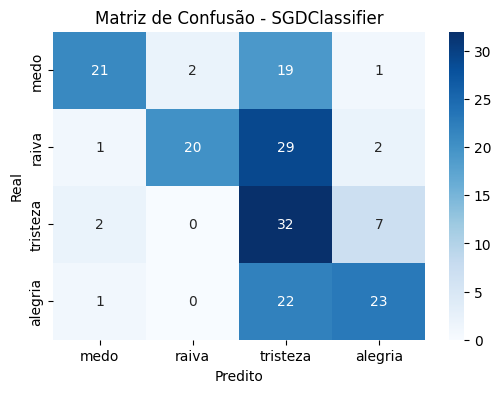

In [ ]:
# Imprime relat√≥rio e matriz de confus√£o para cada modelo
print("=== Naive Bayes ===")
print(classification_report(y_teste, y_pred_nb))
plotar_matriz_confusao(y_teste, y_pred_nb, "Naive Bayes")

print("=== Regress√£o Log√≠stica ===")
print(classification_report(y_teste, y_pred_lr))
plotar_matriz_confusao(y_teste, y_pred_lr, "Regress√£o Log√≠stica")

print("=== Random Forest ===")
print(classification_report(y_teste, y_pred_rf))
plotar_matriz_confusao(y_teste, y_pred_rf, "Random Forest")

print("=== GradientBoostingClassifier ===")
print(classification_report(y_teste, y_pred_gdb))
plotar_matriz_confusao(y_teste, y_pred_gdb, "GradientBoostingClassifier")

print("=== SGDClassifier ===")
print(classification_report(y_teste, y_pred_sgd))
plotar_matriz_confusao(y_teste, y_pred_sgd, "SGDClassifier")






# Agora o que voc√™ deve fazer para melhorar esses resultados? ser√° que aumentar a base de cada frase seria uma solu√ß√£o?

# Mas antes disso vamos testar cada modelo com frases aleat√≥rias

In [ ]:
# Fun√ß√£o para testar frases novas
def testar_frase(frase):
    frase_limpa = limpar_texto(frase)
    frase_vet = vetorizador.transform([frase_limpa])

    pred_nb = modelo_nb.predict(frase_vet)[0]
    pred_lr = modelo_lr.predict(frase_vet)[0]
    pred_rf = modelo_rf.predict(frase_vet)[0]
    pred_gdb = modelo_gdb.predict(frase_vet)[0]
    pred_sgd = modelo_sgd.predict(frase_vet)[0]



    print(f'Frase: "{frase}"')
    print(f'Previs√£o Naive Bayes: {pred_nb}')
    print(f'Previs√£o Regress√£o Log√≠stica: {pred_lr}')
    print(f'Previs√£o Random Forest: {pred_rf}')
    print(f'Previs√£o GradientBoosting Classifier: {pred_gdb}')
    print(f'Previs√£o SGDC Classifier: {pred_sgd}')



In [ ]:
nova_frase = "Esse produto √© excelente e eu adorei!"
testar_frase(nova_frase)

Frase: "Esse produto √© excelente e eu adorei!"
Previs√£o Naive Bayes: alegria
Previs√£o Regress√£o Log√≠stica: alegria
Previs√£o Random Forest: alegria
Previs√£o GradientBoosting Classifier: alegria
Previs√£o SGDC Classifier: alegria


In [ ]:
nova_frase = "Eu adoro python"
testar_frase(nova_frase)

Frase: "Eu adoro python"
Previs√£o Naive Bayes: alegria
Previs√£o Regress√£o Log√≠stica: alegria
Previs√£o Random Forest: alegria
Previs√£o GradientBoosting Classifier: alegria
Previs√£o SGDC Classifier: alegria


In [ ]:
nova_frase = "Eu amo o projeto dos Pequenos Talentos"
testar_frase(nova_frase)

Frase: "Eu amo o projeto dos Pequenos Talentos"
Previs√£o Naive Bayes: alegria
Previs√£o Regress√£o Log√≠stica: alegria
Previs√£o Random Forest: alegria
Previs√£o GradientBoosting Classifier: alegria
Previs√£o SGDC Classifier: alegria


In [ ]:
nova_frase = "O fulano faz tudo errado, n√£o consigo ensinar pra ele."
testar_frase(nova_frase)

Frase: "O fulano faz tudo errado, n√£o consigo ensinar pra ele."
Previs√£o Naive Bayes: tristeza
Previs√£o Regress√£o Log√≠stica: tristeza
Previs√£o Random Forest: tristeza
Previs√£o GradientBoosting Classifier: tristeza
Previs√£o SGDC Classifier: tristeza


In [ ]:
nova_frase = "Fico irritada quando vou olhar o boletim e est√° cherio de nota abaixo de 7"
testar_frase(nova_frase)

Frase: "Fico irritada quando vou olhar o boletim e est√° cherio de nota abaixo de 7"
Previs√£o Naive Bayes: tristeza
Previs√£o Regress√£o Log√≠stica: tristeza
Previs√£o Random Forest: tristeza
Previs√£o GradientBoosting Classifier: tristeza
Previs√£o SGDC Classifier: tristeza


In [ ]:
nova_frase = "eu odeio quando ele maltrata a crian√ßa"
testar_frase(nova_frase)

Frase: "eu odeio quando ele maltrata a crian√ßa"
Previs√£o Naive Bayes: medo
Previs√£o Regress√£o Log√≠stica: alegria
Previs√£o Random Forest: tristeza
Previs√£o GradientBoosting Classifier: tristeza
Previs√£o SGDC Classifier: tristeza
